<a id='ReturntoTop'></a>


<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>NLP with Steam Video Game Reviews</h1>
      <h3>Notebook 1 - EDA and Data Exploration</h3>
      <p>Author: David Lappin | Date: 5/12/2023 - 7/24/2023 </p>
    </div>
    <img src="bannerphoto/banner.jpg" alt="your-image-description" style="height:225px; margin-left:50px; border: 8px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose

The general purpose of this project is to explore Natural Language Processing (NLP), and how we can prepare data and create models to interpret and contextualize text data. We will be using Video Game reviews from the popular host platform 'Steam'. With the data we will perform Exploratory Data Analysis (EDA)  and create a data cleaning process to prepare the dataset for various modeling techniques that are specifically useful for dealing with text data. Our main goal will be to perform a sentiment analysis and create and compare models focused on predicting review sentiment.

Note that the data set is relatively small and therefore this project is more of an exploratory approach to theses types of problems. In order to create viable working models, we would need much larger data sets and more computational power. This is discussed more in sections of the project where relevant.

**For this first notebook we will explore:**
- General data set information
- Basic EDA
- Data set imbalances


Data Source: https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews


# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Example Reviews](#3)

[Total Reviews by Title](#4)

[Positive Vs Negative Reviews](#5)

[Percent Positivity](#6)

[Summary and Next Steps](#7)

# Packages Import
<a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk_metrics

# Data Import
[Return to Top](#ReturntoTop)
<a id='2'></a>

Import the reviews csv and explore some of the data within:

In [2]:
#import data

raw_df = pd.read_csv('data/train.csv')
raw_df.head(10)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


We can look at some of the columns and the data types. There are 5 columns and no null values in any of the columns. We will not need to do any data imputation. Some of the data is non-numeric so we will have to change this before modeling:

In [4]:
#general data information

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


We can look at the overall size and shape of the data set. This is a reasonable data set for exploration but is not-overwhelmingly large. We may have to consider the size of the dataset later when we expand the reviews with count vectorization:

In [3]:
# dataframe.size
size = raw_df.size
  
# dataframe.shape
shape = raw_df.shape

print(f'The size of the datframe is: {size}')
print(f'The shape of the data frame is: {shape}')  

The size of the datframe is: 87470
The shape of the data frame is: (17494, 5)


We can check to see if there are any duplicated entries in the data set that we need to worry about and we find that there appear to be none:

In [21]:
#check for duplicated values

raw_df.duplicated().sum()

0

Lets look at a few of the Review examples:
<a id='1'></a>

In [103]:
for x in raw_df['user_review'].sample(n=10, random_state=1001):
    print(x)
    print('\n')

Clicker game that doesn't need you to click.You can just leave the game to play at background while you do your stuffs (including work, yeah, I've done it. Don't try this at supervised office computer, though), and come back once in a while to upgrade all your crusaders, then get back to what you were doing.The fairly recent addition of Mission makes collecting crusaders worth it.This game is an example of how F2P should be, many freebies - you can buy Jeweled Chests using Rubies which generously given by daily tasks and missions, and every event there are at least 3 Jeweled Event Chests for you, plus 1 extra for you newsletter subscriber.Definitely 5/7


ehh ส์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์ั์ํ์่์ํ์ั์ํ์๋์ํ์ั์ํ์็์ํ์ั์ํ์๋์ํ์

### Observations:

From this sample we can see some examples of positive and negative reviews. The lengths and the over-all sentiment of the reviews vary considerably. We can also observe that some of the reviews (like the first in this example) contain non-text data. We will need to find a way to remove entries like this when we begin to clean up the data. Lets look at a few more things and then we can construct a plan to clean up this data for modeling.

In [30]:
raw_df['title'].nunique()

44

We have 44 unique Game titles. Lets look a bit more at the distribution. Do some of the games have more samples than others?
<a id='4'></a>

In [34]:
raw_df['title'].value_counts()


Robocraft                                             842
Eternal Card Game                                     791
Heroes & Generals                                     745
War Thunder                                           720
Fractured Space                                       718
Bless Online                                          712
The Elder Scrolls®: Legends™                          565
Neverwinter                                           546
AdventureQuest 3D                                     519
theHunter Classic                                     518
Creativerse                                           492
DCS World Steam Edition                               488
Team Fortress 2                                       479
Infestation: The New Z                                479
PlanetSide 2                                          472
Path of Exile                                         458
SMITE®                                                454
Fallout Shelte

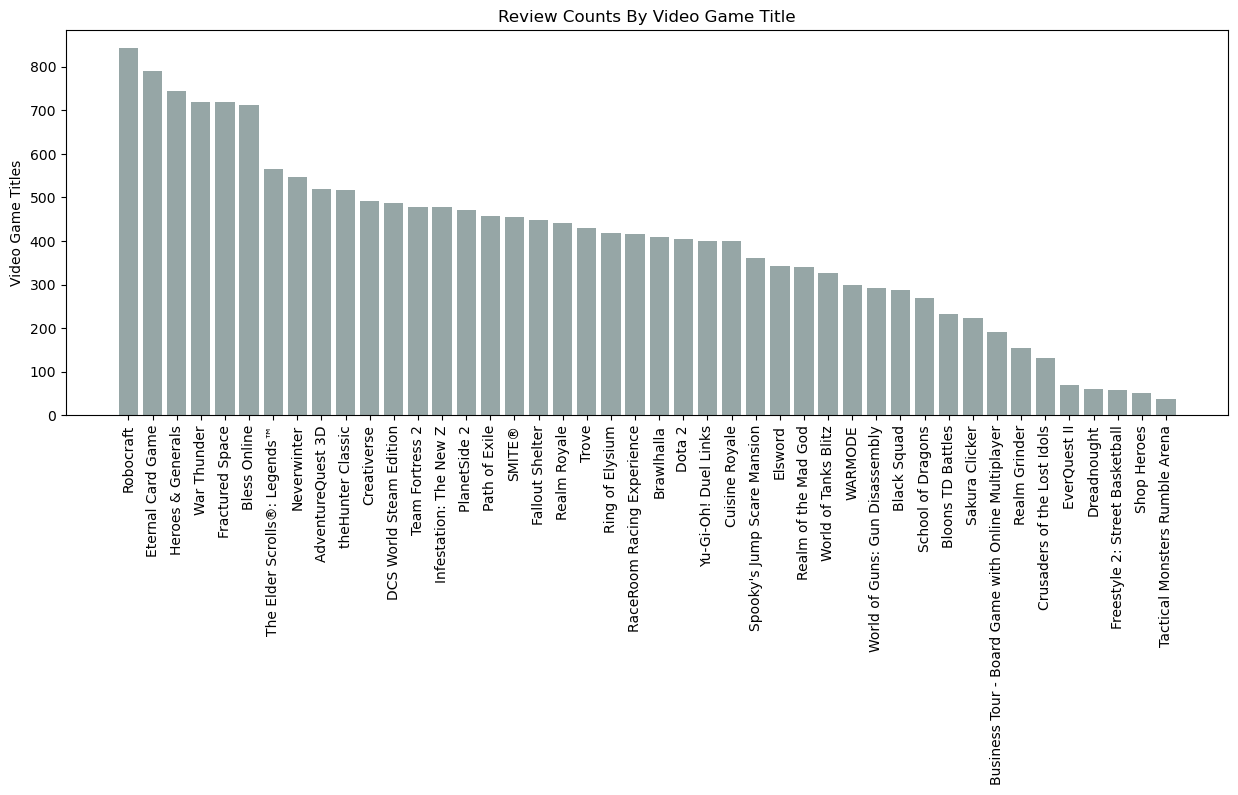

In [68]:
plt.figure(figsize = (15,5))

#data
plt.bar(title_counts.index, title_counts.values, color = 'darkslategray', alpha = 0.5)

#descriptions
plt.title("review counts by video game title".title())
plt.ylabel("Count")
plt.ylabel("Video Game Titles")

#styling
plt.xticks(rotation=90)

plt.show()

### Observations:

Based on the above visualization we can see that not all of the Video Games are Reviewed equally. We may have to find ways to address this imbalance, but for now we can just be aware that it exists. 

Lets expand on this a bit more to see if we have data imbalances between positive and negative reviews within each video game. To do this we will make a temporary data frame to hold all the counts. We can use the value counts above to represent the total reviews per video game as we have already seen. Next, since the recommendation is binary (1 recommend or 0 don't recommend) we can simply group by the video game titles and sum the user suggestions to get a total of the positive reviews. Lastly we can take the difference between the two to find the negative reviews. 

We will store all this in the pandas data frame below and then visualize the results.

In [107]:
# calculate the positive reviews and group by video game title
pos_reviews = raw_df.groupby('title')['user_suggestion'].sum()

# calulate the total number of reviews for each video game title
total_counts = raw_df['title'].value_counts()

# create a new DataFrame with total counts, positive counts and the difference
counts_df = pd.DataFrame({'total_reviews': total_counts, 'positive_reviews': pos_reviews})
counts_df['negative_reviews'] = counts_df['total_reviews'] - counts_df['positive_reviews']

# show results
counts_df.head(5)

,total_reviews,positive_reviews,negative_reviews
AdventureQuest 3D,519,297,222
Black Squad,288,248,40
Bless Online,712,151,561
Bloons TD Battles,233,96,137
Brawlhalla,410,355,55


Great! now we can visualize these results and see where we may have some additional data imbalances. Lets look at the overall totals first. Are the total positive and total negative reviews similar?
<a id='5'></a>

In [97]:
#Sum the total of each (positive/negative/total)
tot_reviews = counts_df['total_reviews'].sum()
tot_positive_reviews = counts_df['positive_reviews'].sum()
tot_negative_reviews = counts_df['negative_reviews'].sum()

print(f'Out of all {tot_reviews} reviews, there are {tot_positive_reviews} positive reviews and {tot_negative_reviews} negative reviews')

Out of all 17494 reviews, there are 9968 positive reviews and 7526 negative reviews


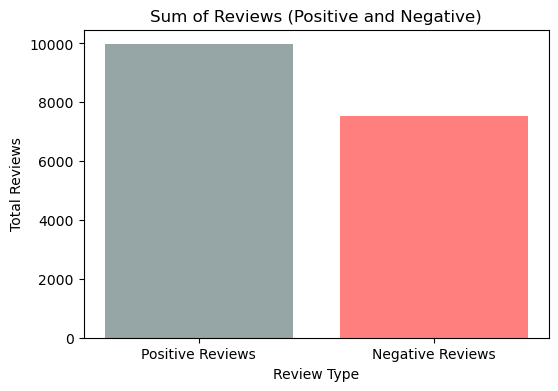

In [120]:
# set figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the sum of posiotive and sum of neagtive as bars
ax.bar('Positive Reviews', tot_positive_reviews, color='darkslategray', alpha = 0.50)
ax.bar('Negative Reviews', tot_negative_reviews, color='red', alpha = 0.50)

# labels and titles
ax.set_xlabel('Review Type')
ax.set_ylabel('Total Reviews')
ax.set_title('Sum of Reviews (Positive and Negative)')

# Show the plot
plt.show()

### Observations:

Overall, the positive and negative reviews are not terribly imbalanced. There are slightly less negative reviews across all game titles than positive reviews. We can consider different techniques to mitigate this slight imbalance later. For now lets dig a bit deeper into each game title. How to the positive vs negative reviews vary by each game title?

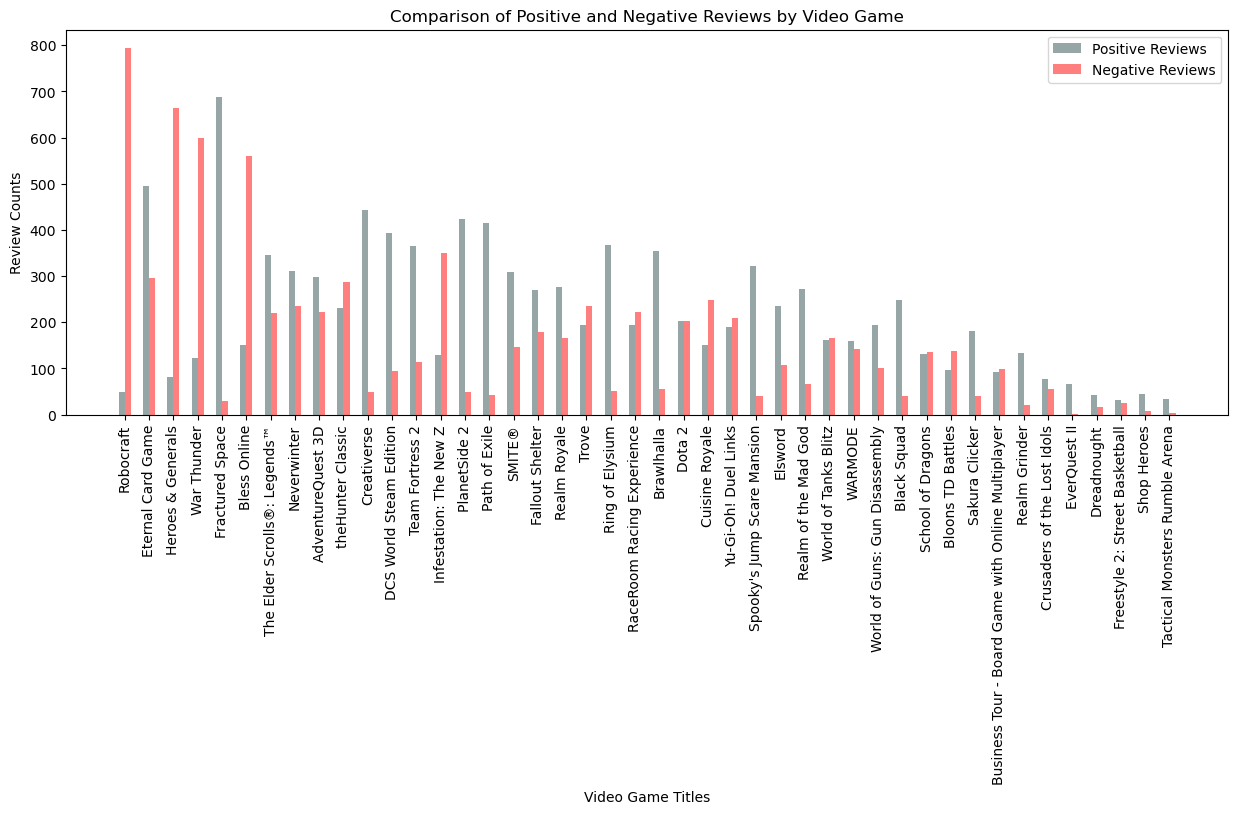

In [32]:
# sort by total reviews in descending order
counts_df = counts_df.sort_values('total_reviews', ascending=False)

# set variables for positive, negative and title
titles = counts_df.index
positive_counts = counts_df['positive_reviews']
negative_counts = counts_df['negative_reviews']

# set up figure and bar layout options 
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.25
r1 = range(len(titles))
r2 = [x + bar_width for x in r1] #shifts next bar by the set bar width 

# plot the positive reviews series
ax.bar(r1, positive_counts, color='darkslategray', alpha = 0.5, width=bar_width, label='Positive Reviews')

# plot the negative reviews series
ax.bar(r2, negative_counts, color='red', alpha = 0.5, width=bar_width, label='Negative Reviews')

# lables 
ax.set_xlabel('Video Game Titles')
ax.set_ylabel('Review Counts')
ax.set_title('Comparison of Positive and Negative Reviews by Video Game')
ax.set_xticks([r + bar_width/2 for r in r1]) #shifts nextgame title by the set bar width 
ax.set_xticklabels(titles, rotation='vertical')
ax.legend()

# plot
plt.show()

### Observations 
The visual above shows a bunch of different results. It varies greatly game but most games are biased to either more positive or more negative reviews. If we just look at a selection of the 10 video games with the most total reviews it may be easier to see.

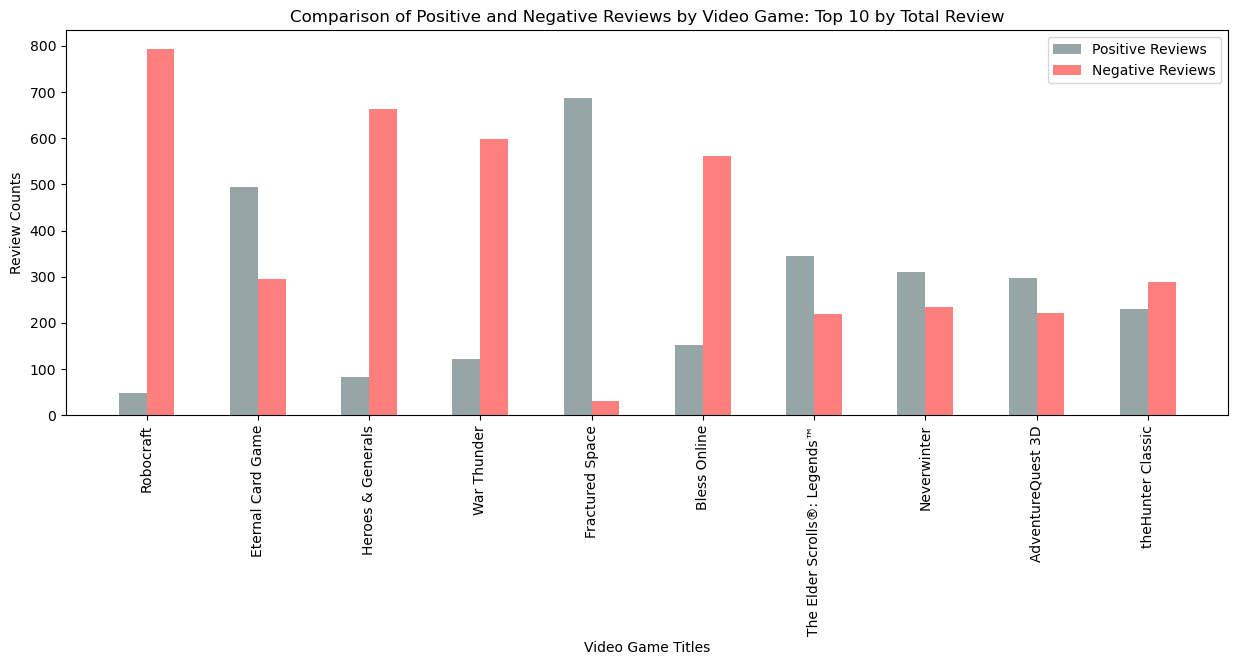

In [33]:
# sort by total reviews in descending order
counts_df = counts_df.sort_values('total_reviews', ascending=False)

top10df = counts_df.head(10)

# set variables for positive, negative and title
titles = top10df.index
positive_counts = top10df['positive_reviews']
negative_counts = top10df['negative_reviews']

# set up figure and bar layout options 
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.25
r1 = range(len(titles))
r2 = [x + bar_width for x in r1] #shifts next bar by the set bar width 

# plot the positive reviews series
ax.bar(r1, positive_counts, color='darkslategray', alpha = 0.5, width=bar_width, label='Positive Reviews')

# plot the negative reviews series
ax.bar(r2, negative_counts, color='red', alpha = 0.5, width=bar_width, label='Negative Reviews')

# lables 
ax.set_xlabel('Video Game Titles')
ax.set_ylabel('Review Counts')
ax.set_title('Comparison of Positive and Negative Reviews by Video Game: Top 10 by Total Review')
ax.set_xticks([r + bar_width/2 for r in r1]) #shifts nextgame title by the set bar width 
ax.set_xticklabels(titles, rotation='vertical')
ax.legend()

# plot
plt.show()

### Observations

This is a bit easier to look at and shows some of the review sentiment distributions a bit clearer. We can see that some of the examples are extremely positive like (Fractured Space), while others are extremely negative like (Robocraft). Others like Neverwinter and AdventureQuest_3D are more balanced.

The last thing we can look at, which is essentially a revised version of the above, is an overall assessment of each video games 'sentiment'. We can calculate the 'positive sentiment' as a percentage using the temporary table created above for the counts. Instead of the distance we can look at the percent of total reviews that are positive for each game. From this we can look at the distribution of positivity across different games as well as other basic statistical information.

<a id='6'></a>

In [122]:
counts_df.head(10)

,total_reviews,positive_reviews,negative_reviews
AdventureQuest 3D,519,297,222
Black Squad,288,248,40
Bless Online,712,151,561
Bloons TD Battles,233,96,137
Brawlhalla,410,355,55
Business Tour - Board Game with Online Multiplayer,191,92,99
Creativerse,492,443,49
Crusaders of the Lost Idols,132,77,55
Cuisine Royale,399,150,249
DCS World Steam Edition,488,394,94


In [123]:
# Calculate new percentage and add to df
counts_df['percent_positive'] = ((counts_df['positive_reviews'] / counts_df['total_reviews'])* 100).round(2)

# Show
counts_df.head(10)

,total_reviews,positive_reviews,negative_reviews,percent_positive
AdventureQuest 3D,519,297,222,57.23
Black Squad,288,248,40,86.11
Bless Online,712,151,561,21.21
Bloons TD Battles,233,96,137,41.20
Brawlhalla,410,355,55,86.59
Business Tour - Board Game with Online Multiplayer,191,92,99,48.17
Creativerse,492,443,49,90.04
Crusaders of the Lost Idols,132,77,55,58.33
Cuisine Royale,399,150,249,37.59
DCS World Steam Edition,488,394,94,80.74


In [124]:
#describe basic statistical information
counts_df['percent_positive'].describe()

count    44.000000
mean     62.203182
std      23.782700
min       5.700000
25%      47.970000
50%      61.750000
75%      86.195000
max      97.100000
Name: percent_positive, dtype: float64

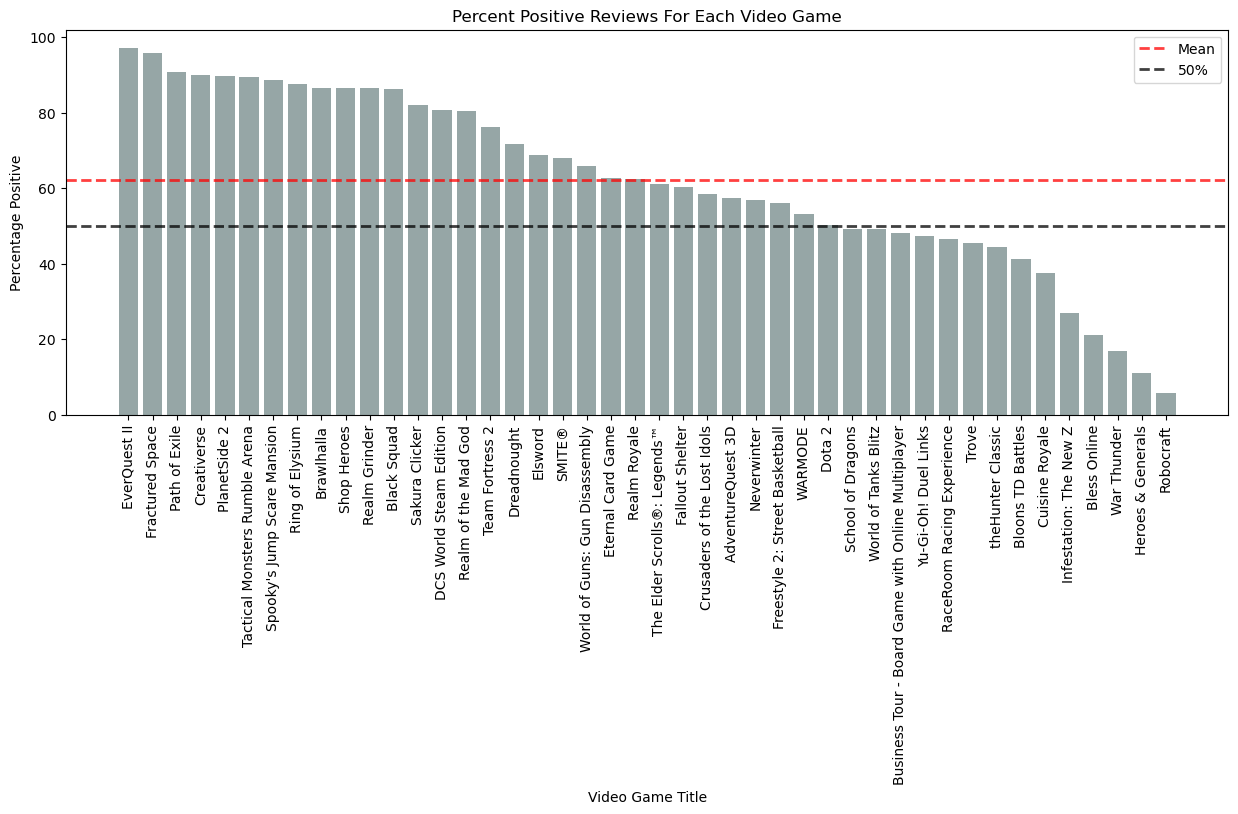

In [125]:
#sort by percent_positive
counts_df = counts_df.sort_values('percent_positive', ascending=False)

#plot figure 
plt.figure(figsize = (15,5))

#plt percentages
plt.bar(counts_df.index, counts_df['percent_positive'], color = 'darkslategray', alpha = 0.5)

#plt mean percent positive
plt.axhline(counts_df['percent_positive'].mean(), linestyle = '--', linewidth = 2, 
            color = 'red', alpha = 0.75, label = 'Mean')

#plt the 50% line (above which is positive)
plt.axhline(50, linestyle = '--', linewidth = 2, color = 'black', alpha = 0.75, label = '50%')


#plot description and labels
plt.title('Percent positive reviews for each video game'.title())
plt.ylabel('Percentage Positive')
plt.xlabel('Video Game Title')
plt.legend()

#plot formatting
plt.xticks(rotation = 90)


plt.show()

### Observations:

So we can see above a lot of the information we have already uncovered but in a more succinct display. As noted prior, there are more positive reviews overall than negative reviews which is apparent in the visual above since most of the video game titles are equal to or greater than 50% positive. In fact, the mean percent positive value is 62%. Lastly, we could use this EDA to further analyze video games by title if desired. We could use this information to focus on, for example, the top ten positive games that are doing the best, or the worst 10 games that need the most adjustment. 

Instead, we are going to move on to summarizing the information and creating a plan to clean the data in prep for modeling. 

# Summary and Next Steps:
<a id='7'></a>
[Return to Top](#ReturntoTop)

**From the Preliminary EDA we found the following out and completed the following tasks for our dataset:**
- This is a relatively small data set with only ~17,000 reviews
- There are 44 unique video game titles with multiple reviews for each. Each review also logs an overall (binary) recommendation.
- There where no duplicate or missing values and no data imputation was required
- Of the reviews we noted that some have non-english words and symbols.
- There are a few data imbalances in our data
    - There are more overall positive reviews than negative reviews
    - There are varying amounts of reviews by each title
    - There are varying amounts of positive and negative reviews within each title (some are highly positive and others are highly negative)
- Generally speaking, the games are mostly positively reviewed (assuming positive percentage greater than 50%)


**Next Steps: (Data Cleaning and Prep)**
- Firstly we will need to remove non-english reviews
    - re-evaluate the amount of data we have and the distribution between positive and negative reviews after this
- Determine if we will employ methods to reduce data imbalances (ex: Under vs Over Sampling, Class weighting, Data Augmentation

    

### Next steps are located in the Second Notebook - '2.0_DataCleaning_and_Prep'

------------------------------------------------------------------------------------------------------------------------------